In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [201]:
df = pd.read_csv(r"D:\LPU\sem 5\INT 234\PRED_PROJECT\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [202]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [203]:
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
print(cat_cols)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [204]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [206]:
df['BMI'] = df['Weight']/(df['Height']**2)
df['BMI'].head()

0    24.386526
1    24.238227
2    23.765432
3    26.851852
4    28.342381
Name: BMI, dtype: float64

In [207]:
num_cols = df.select_dtypes(include = ['float','int64']).columns.tolist()
print(num_cols)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']


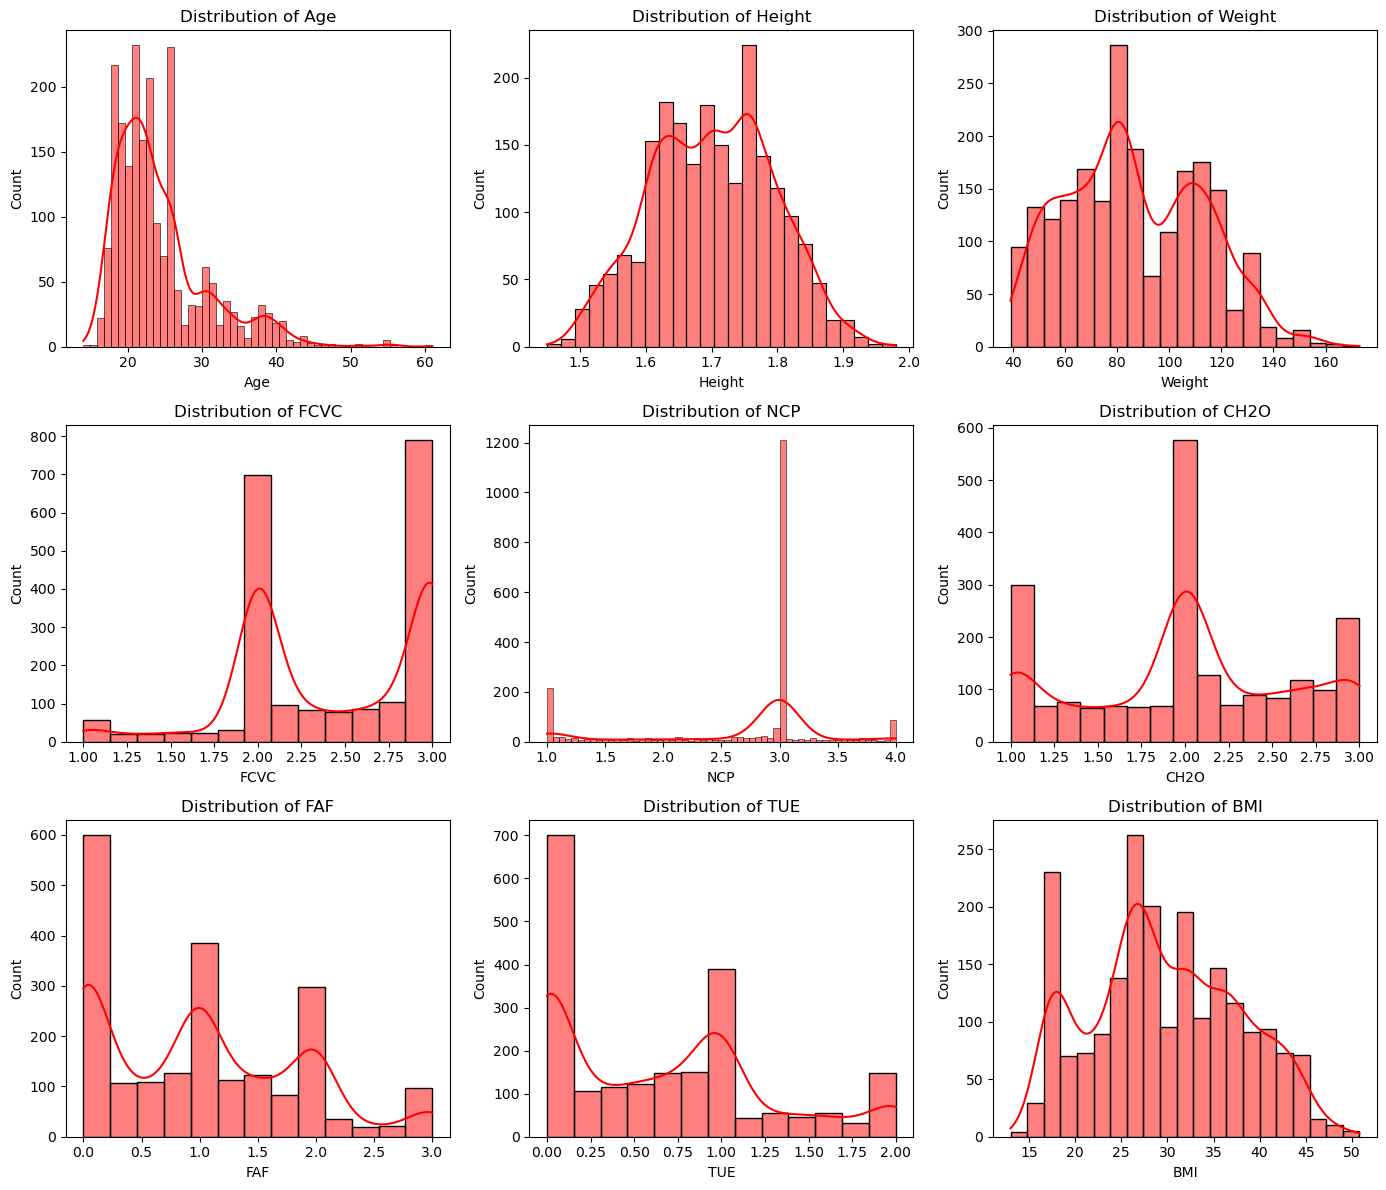

In [208]:
plt.figure(figsize=(14,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color="r")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

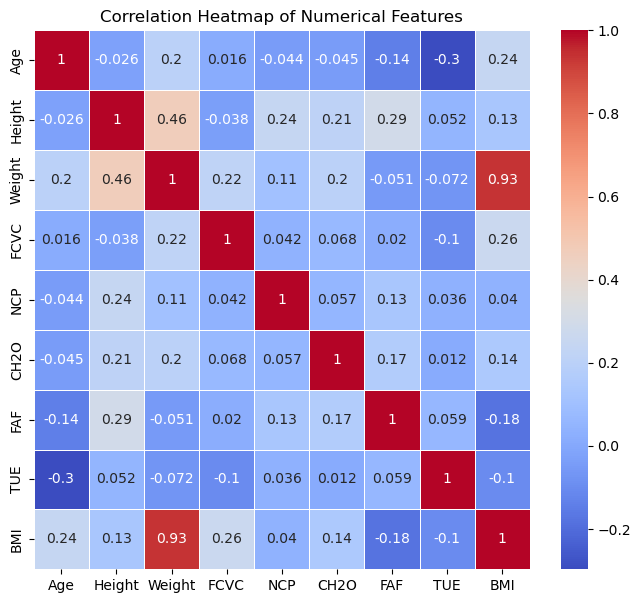

In [209]:
plt.figure(figsize=(8,7))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [210]:
df_clean = df.copy()
for col in cat_cols:
    unique_vals = df_clean[col].nunique()
    if unique_vals==2:
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col])

        

In [211]:
df_clean = pd.get_dummies(df_clean,columns=['CAEC','CALC','MTRANS'],drop_first = True)

In [212]:
le = LabelEncoder()
df_clean['NObeyesdad'] = le.fit_transform(df_clean['NObeyesdad'])
df_clean.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,False,True,False,False,False,True,False,False,True,False
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,False,True,False,False,True,False,False,False,True,False
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,False,True,False,True,False,False,False,False,True,False
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,False,True,False,True,False,False,False,False,False,True
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,False,True,False,False,True,False,False,False,True,False


In [213]:
print(df_clean.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'NObeyesdad', 'BMI', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')


In [214]:
X = df_clean.drop(columns=['NObeyesdad'])
Y = df_clean['NObeyesdad']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(1688, 24) (1688,) (423, 24) (423,)


In [215]:
sc = StandardScaler()
col_to_scale = ['Age','Height','Weight']
sc.fit(x_train[col_to_scale])

x_train[col_to_scale]=sc.transform(x_train[col_to_scale])
x_test[col_to_scale]=sc.transform(x_test[col_to_scale])
print(x_train[col_to_scale].head())


          Age    Height    Weight
459 -0.830923  0.620541 -0.289869
426 -0.361495  0.513995 -0.635417
326 -0.987399 -0.018735 -1.199811
971 -0.751685  1.307219  0.042472
892 -1.130536 -1.770158 -1.124592


In [216]:
lgr = LogisticRegression(max_iter=2000)
lgr.fit(x_train,y_train)
y_lgr_pred = lgr.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_lgr_pred))

Accuracy score:  0.9645390070921985


C:\Users\gok17\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [217]:
print("Classification report : ")
print(classification_report(y_lgr_pred,y_test))

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.90      0.96      0.93        54
           2       0.99      0.99      0.99        70
           3       1.00      0.98      0.99        61
           4       0.98      1.00      0.99        64
           5       0.93      0.90      0.92        60
           6       0.95      0.95      0.95        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423



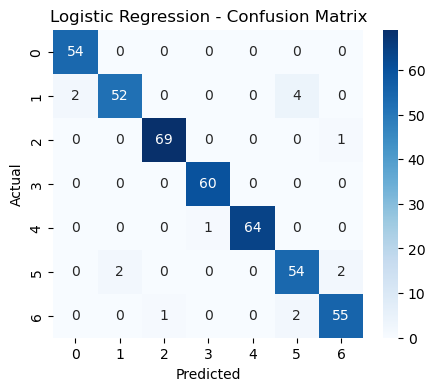

Confusion Matrix :
 [[54  0  0  0  0  0  0]
 [ 2 52  0  0  0  4  0]
 [ 0  0 69  0  0  0  1]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  2  0  0  0 54  2]
 [ 0  0  1  0  0  2 55]]


In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_lgr_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Confusion Matrix :\n",cm)

In [219]:
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)

print("Accuracy Score: ",accuracy_score(y_test,y_rf_pred))
print("Classification Report: \n",classification_report(y_test,y_rf_pred))

Accuracy Score:  0.983451536643026
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.92      0.98      0.95        58
           2       0.99      1.00      0.99        70
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        65
           5       0.98      0.93      0.96        58
           6       1.00      1.00      1.00        58

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



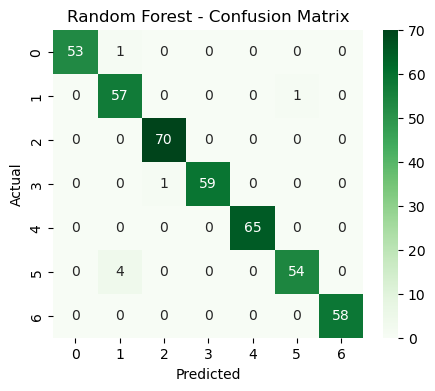

In [220]:
cm_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [221]:
#--------------------------------------------------UNSUPERVISED_LEARNING---------------------------------------------------------------------------------

C:\Users\gok17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\gok17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\gok17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\gok17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

***** [119780.61865620554, 42398.85847194868, 24034.733268442873, 16733.22877963374, 13925.430247194137, 12411.279327514267, 11623.989336668166, 11429.61955957215, 10256.796562988697, 9565.251937512308]


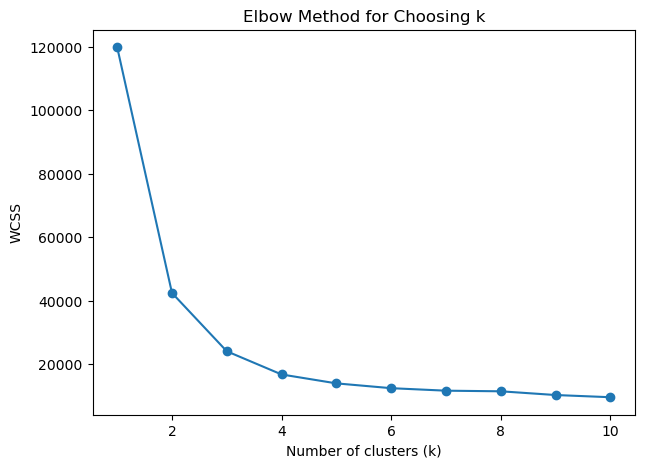

In [222]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)   # inertia_ = WCSS

# Plot the elbow graph
plt.figure(figsize=(7,5))
print("*****",wcss)
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Choosing k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [223]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(x_train)

print("Cluster labels:", clusters[:10])

Cluster labels: [0 0 0 0 0 0 0 1 0 0]


C:\Users\gok17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [224]:
inertia = kmeans.inertia_
print("WCSS INTERTIA : ",inertia)
print("Silhouette Score : ",silhouette_score(x_train,clusters))


WCSS INTERTIA :  42398.858471948675
Silhouette Score :  0.5147691207214435


In [225]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [226]:
Z = linkage(x_train, method='ward')

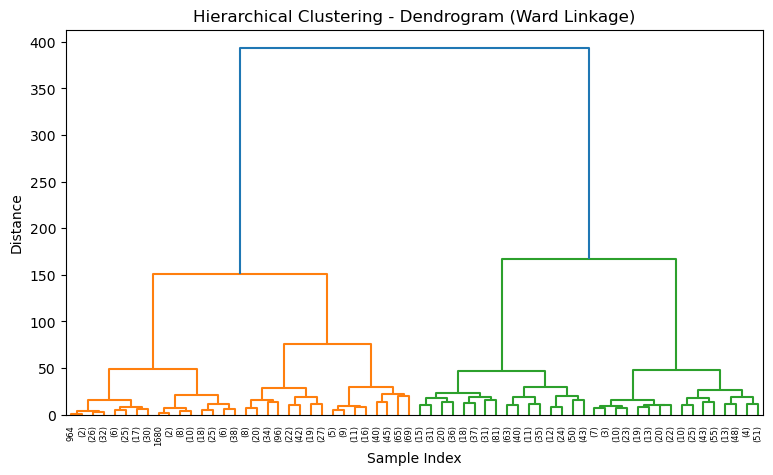

In [227]:
plt.figure(figsize=(9, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering - Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [228]:
from scipy.cluster.hierarchy import fcluster

# hier_labels = labels assigned by hierarchical clustering
hier_labels = fcluster(Z, t=2, criterion='maxclust')
print(hier_labels[:20])
print("Silhouette Score : ",silhouette_score(x_train,hier_labels))

[2 2 2 2 2 2 2 1 2 2 1 1 2 2 1 2 1 2 1 1]
Silhouette Score :  0.5139027640360816


In [229]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(x_train)
print("GMM Cluster Labels (first 20):")
print(gmm_labels[:20])
sil_gmm = silhouette_score(x_train, gmm_labels)
print("GMM Silhouette Score:", sil_gmm)

GMM Cluster Labels (first 20):
[0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1]
GMM Silhouette Score: 0.26021475876093414


C:\Users\gok17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [230]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)


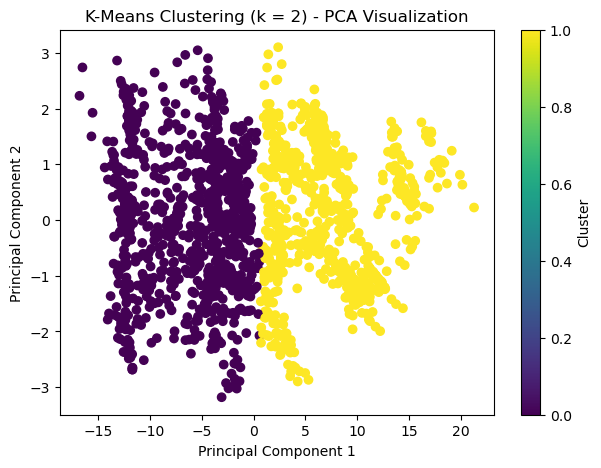

In [231]:
import matplotlib.pyplot as plt
kmeans_labels = kmeans.labels_
plt.figure(figsize=(7,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_labels)
plt.title("K-Means Clustering (k = 2) - PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()
